# Quiz 2 - Friedrich Müller

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.



(20000, 1, 28, 28) float32
(20000,) int64
(2000, 1, 28, 28) float32


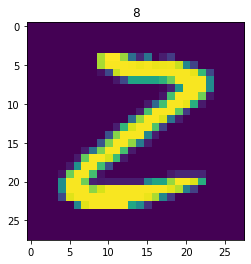

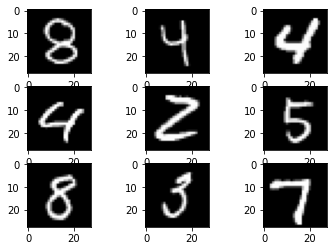

In [1]:
# Import of Data

import numpy as np
import matplotlib.pyplot as plt

with np.load('prediction-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)

plt.imshow(data_x[4, 0])
plt.title(data_y[0])
plt.show()
# print(data_x[0].shape)
# print(data_x[5][0]) # this is where the matrix is at - (see shape)

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(data_x[i, 0], cmap=plt.get_cmap('gray'))
# # show the figure
# print("Plot of a Subset of Images From the MNIST Dataset: ")
# plt.show()

In [2]:
# Derived for the most part from
# https://medium.com/analytics-vidhya/build-your-1st-deep-learning-classification-model-with-mnist-dataset-1eb27227746b
# import os
# os.environ['KERAS_BACKEND']='tensorflow'
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from sklearn.model_selection import train_test_split
#load mnist dataset
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# (x_train,y_train),(x_test,y_test)= mnist.load_data()
# plt.imshow(x_train[0], cmap=plt.get_cmap('gray')) 
# print("x_train.shape: ", x_train.shape)
# print("x_train.shape[0]: ", x_train.shape[0])

#Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# print("x_train.shape: ", x_train.shape)
# print("x_test.shape: ", x_test.shape)

# Making sure that the values are float so that we can get decimal 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255


model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(200,activation = tf.nn.relu)) 
model.add(Dropout(0.3)) 
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x= x_train , y = y_train , epochs= 1)
# 1 epoch is almost sufficient


Using TensorFlow backend.
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\fjun\anaconda3\envs\tf\lib\site-packages\tensorflo

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/1
16000/16000 [==============================] - 124s 8ms/step - loss: 0.3684 - accuracy: 0.8867


In [3]:
# evaluate the model on the test data
model.evaluate(x_test, y_test)

4000/4000 [==============================] - 18s 5ms/step


[0.168065920047462, 0.9502500295639038]

In [4]:
import numpy as np
x_predict = test_x.reshape(test_x.shape[0], 28, 28, 1)
predictions = model.predict(x_predict)

# prediction = np.empty([2000]) 
prediction = np.argmax(predictions, axis=1) # THAT'S YOUR JOB
print(prediction.shape)

# 100 prints to compare some results
# for i in range(100):
#     print(test_x[i])
#     print(prediction[i])
  

# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 2000

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', prediction)

(2000,)


In [10]:
data_preds = np.load('prediction.npy')
# print(data_preds.size)
c = 0
# for i in data_preds:
#     print(i)
print(len(data_preds))

2000
